In [1]:
# run this cell
import pandas as pd
from datascience import *
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Final Project: Soccer

### Table of Contents

1. <a href='#section 1'>Formulating a Question or Problem</a> 


2. <a href='#section 2'>Acquiring and Preparing Data</a>


3. <a href='#section 3'>Conducting Exploratory Data Analysis</a>


4. <a href='#section 4'>Using Prediction and Inference to Draw Conclusions</a>
<br><br>

### Background Knowledge <a id='section 0'></a>


Nothing frustrates both soccer fans and players as much as being [red-carded](https://en.wikipedia.org/wiki/Penalty_card#Red_card). In soccer, receiving a red card from the referee means that the player awarded the red card is expelled from the game. Consequently his team must play with one fewer player for the remainder of the game.

Due to the inherently subjective nature of referees' judgments, questions involving the fairness of red card decisions crop up frequently, especially when soccer players with darker complexions are red-carded.

For the remainder of this project, we will explore a dataset on red-cards and skin color and attempt to understand how different approachs to analysis can lead to different conclusions to the general question: "Are referees more likely to give red cards to darker-skinned players?"


 <img src="images/redcard.jpg" width = 700/>

# The Data Science Life Cycle

## 1. Formulating a Question or Problem <a id='section 1'></a>
It is important to ask questions that will be informative and that will avoid misleading results. 

<div class="alert alert-info">
<b>Question:</b> Recall the questions about red cards and skin color that you developed with your group. Write down that question below, and try to add onto it with the context from the articles. Think about what data you would need to answer your question.
   </div>

**Your questions:** *here*

**Data you would need:** *here*


**Article:** *link*

## 2. Acquiring and Cleaning Data <a id='subsection 1b'></a>
 
In this notebook, you'll be working with a dataset containing entries for many European soccer players, containing variables such as club, position, games, and skin complexion.

Important to note about this dataset is that it was generated as the result of an [observational study](https://en.wikipedia.org/wiki/Observational_study), rather than a [randomized controlled experiment](https://en.wikipedia.org/wiki/Randomized_controlled_trial). In an observational study, entities' independent variables (such as race, height, zip code) are observed, rather than controlled as in the randomized controlled experiment. Though data scientists often prefer the control and accuracy of controlled experiments, often performing one is either too costly or poses ethical questions (e.g., testing trial drugs and placebo treatments on cancer patients at random). Though our dataset was generated organically--in the real world rather than in a laboratory--it is statistically more challenging to prove causation among variables for these kinds of observational studies.


Please read this summary of the [dataset's description](https://osf.io/9yh4x/) to familiarize yourself with the context of the data:

>*...we obtained data and profile photos from all soccer players (N = 2053) playing in the first male divisions of England, Germany, France and Spain in the 2012-2013 season and all referees (N = 3147) that these players played under in their professional career. We created a dataset of player dyads including the number of matches players and referees encountered each other and our dependent variable, the number of red cards given to a player by a particular referee throughout all matches the two encountered each other.*

>*...implicit bias scores for each referee country were calculated using a race implicit association test (IAT), with higher values corresponding to faster white | good, black | bad associations. Explicit bias scores for each referee country were calculated using a racial thermometer task, with higher values corresponding to greater feelings of warmth toward whites versus blacks.*

In [2]:
# run this cell to load the data
data = pd.read_csv("data/CrowdstormingDataJuly1st.csv").dropna()
data = Table.from_df(data)

Here are some of the important fields in our data set that we will focus on:

|Variable Name   | Description |
|--------------|------------|
|`player` | player's name |
|`club` | player's soccer club (team) |
|`leagueCountry`| country of player club (England, Germany, France, and Spain) |
|`height` | player height (in cm) |
|`games`| number of games in the player-referee dyad |
|`position` | detailed player position |
|`goals`| goals scored by a player in the player-referee dyad |
|`yellowCards`| number of yellow cards player received from referee |
|`yellowReds`| number of yellow-red cards player received from referee |
|`redCards`| number of red cards player received from referee |
|`rater1`| skin rating of photo by rater 1 (5-point scale ranging from very light skin to very dark skin |
|`rater2`| skin rating of photo by rater 2 (5-point scale ranging from very light skin to very dark skin |
|`meanIAT`|  mean implicit bias score (using the race IAT) for referee country, higher values correspond to faster white good, black bad associations |
|`meanExp`| mean explicit bias score (using a racial thermometer task) for referee country, higher values correspond to greater feelings of warmth toward whites versus blacks |

As you can see on the table above, two of the variables we will be exploring is the ratings on skin tone (1-5) measured by two raters, Lisa and Shareef. For context, we have added a series of images that were given to them so that you can better understand their perspective on skin tones. Keep in mind that this might affect our hypothesis and drive our conclusions. 

Note: On the following images, the only two were the rating for the two raters coincide is image #3 on the top and image #6 on the bottom. 

<img src="images/L1S1.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="images/L1S2.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="images/L2S2.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="images/L3S4.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="images/L4S5.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="images/L5S5.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<p style="clear: both;">

In [3]:
# run this cell show the first ten rows of the data
data.show(10)

playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177,72,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.5,1,1,GRC,0.326391,712,0.000564112,0.396,750,0.00269649
john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179,82,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40,0.0108749,-0.204082,49,0.0615044
aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182,71,Center Back,1,0,0,1,0,0,0,0,3868.jpg,0.25,0,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522
aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187,80,Left Fullback,1,1,0,0,0,0,0,0,47704.jpg,0,0.25,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522
alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180,68,Defensive Midfielder,1,0,0,1,0,0,0,0,22356.jpg,1,1,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522
anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193,80,Goalkeeper,1,0,1,0,0,0,0,0,16528.jpg,0.25,0.25,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522
andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180,70,Right Fullback,1,1,0,0,0,0,0,0,36499.jpg,0,0,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522
antonio-rukavina,Antonio Rukavina,Real Valladolid,Spain,26.01.1984,177,74,Right Fullback,2,2,0,0,0,1,0,0,59786.jpg,0,0,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522
ashkan-dejagah,Ashkan Dejagah,Fulham FC,England,05.07.1986,181,74,Left Winger,1,1,0,0,0,0,0,0,23229.jpg,0.5,0.5,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522
benedikt-hoewedes,Benedikt Höwedes,FC Schalke 04,Germany,29.02.1988,187,80,Center Back,1,1,0,0,0,0,0,0,59387.jpg,0,0,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522


Let's remove the columns we are not going to be working with.

In [4]:
cols_to_drop = make_array("birthday", "victories", "ties", "defeats", "goals",
                "photoID", "Alpha_3", "nIAT", "nExp")

data = data.drop(cols_to_drop)

Let's reload the table to make sure we got rid of all of our undesired columns.

In [5]:
data.show(5)

playerShort,player,club,leagueCountry,height,weight,position,games,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,seIAT,meanExp,seExp
lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,177,72,Attacking Midfielder,1,0,0,0,0.25,0.5,1,1,0.326391,0.000564112,0.396,0.00269649
john-utaka,John Utaka,Montpellier HSC,France,179,82,Right Winger,1,1,0,0,0.75,0.75,2,2,0.203375,0.0108749,-0.204082,0.0615044
aaron-hughes,Aaron Hughes,Fulham FC,England,182,71,Center Back,1,0,0,0,0.25,0,4,4,0.325185,0.00329681,0.538462,0.0137522
aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,187,80,Left Fullback,1,0,0,0,0,0.25,4,4,0.325185,0.00329681,0.538462,0.0137522
alexander-tettey,Alexander Tettey,Norwich City,England,180,68,Defensive Midfielder,1,0,0,0,1,1,4,4,0.325185,0.00329681,0.538462,0.0137522


<div class="alert alert-info">
<b>Question:</b> It's important to evalute our data source. How do you feel about the way ratings on skin tone are collected? What about how implicit/explicit bias is calculated?
   </div>

*Insert answer here*

<div class="alert alert-info">
<b>Question:</b> We want to learn more about the dataset. First, how many total rows are in this table? What does each row represent?
    
   </div>

In [ ]:
total_rows = ...
total_rows

*Insert answer here*

<div class="alert alert-info">
<b>Question:</b> If we're trying to examine the relationship between red cards given and skin color, which variables should we consider? Classify the ones you choose as either independent or dependent variables and explain your choices.
    
   </div>

*Insert answer here*

## 3. Conducting Exploratory Data Analysis <a id='section 3'></a>

Visualizations help us to understand what the dataset is telling us. Let's look at a few.

### Scatter plots

To analyze the correlation between **independent and dependent variables**, we may use a scatter plot as a simple form of data visualization between one numerical "_x_" (independent) variable and one numerical "_y_" (dependent) variable. Below are a few scatterplot examples a data scientist might generate when asking the questions: "How are implicit and explicit bias correlated?" and "Is a player's height correlated with the number of yellow cards he receives?" respectively.

In [6]:
# just run this; you don't need to understand this cell
# it accumulates all the mean implicit and explicit bias values.
data_df = pd.read_csv("data/CrowdstormingDataJuly1st.csv")
meanExp = []
meanIAT = []
for index, row in data_df.iterrows():
    if row["meanExp"] not in meanExp:
        meanExp.append(row["meanExp"])
        meanIAT.append(row["meanIAT"])
exps = np.nan_to_num(meanExp)
iats = np.nan_to_num(meanIAT)

Run the following cell to create a table of means, called `means`.

In [7]:
means = Table().with_columns("meanExps", exps, "meanIATs", iats)
means

meanExps,meanIATs
0.396,0.326391
-0.204082,0.203375
0.588297,0.369894
0.538462,0.325185
-0.789474,0.167132
0.117647,0.322177
0.336101,0.334684
0.335967,0.336628
-0.2,0.360895
-0.487805,0.229733


<div class="alert alert-info">
<b>Question:</b> Use the means table to create a scatter plot of <code>meanExps</code> vs <code>meanIATs</code>. Create a visualization that is informative and has <i>more</i> features than the default plot (i.e., use the other visualization arguments).
   </div>

In [ ]:
...

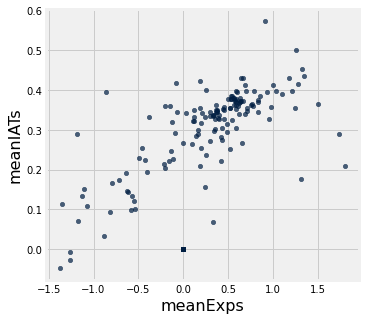

In [8]:
# SOLUTION
means.scatter('meanExps', 'meanIATs')

<div class="alert alert-info">
<b>Question:</b> What do you observe from the scatter plot? Why might these two variables be related in this way? 
   </div>

*Insert Answer Here*

<div class="alert alert-info">
<b>Question:</b> Write code to create a scatter plot of height and the number of yellow cards.
   </div>

In [ ]:
...

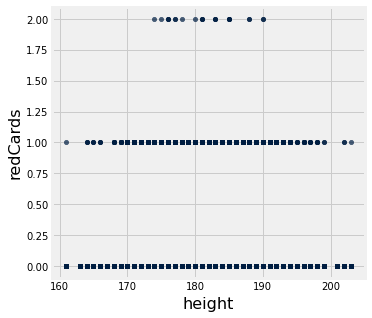

In [9]:
# SOLUTION
data.scatter('height', 'redCards')

<div class="alert alert-info">
<b>Question:</b> What do you observe from the scatter plot? Do the two variables seem to be correlated? Why or why not?
   </div>

*Insert Answer Here*

### Bar plots

Observe below how we're able to use a *pivot table* to make an insightful series of bar plots on the number of red cards awarded by referees officiating in different leagues across Europe. The number to the left of the plots' _y_-axes represents the number of red cards awarded in those kinds of games. The labels of the plots' _y_-axes is the number of games in that particular referee/league combination for the given number of red cards.

Run the following cell to load a new table. The values represent the number of games for each **league/number of red cards** combination:

In [10]:
agg = data.pivot("redCards", "leagueCountry")
agg

/opt/conda/lib/python3.9/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


leagueCountry,0,1,2
England,30720,374,5
France,16102,264,5
Germany,38090,331,5
Spain,29090,463,8


In the following cell, plot a bar chart for each individual league.

In [ ]:
...

/opt/conda/lib/python3.9/site-packages/datascience/tables.py:3006: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(tick_labels, stretch='ultra-condensed')


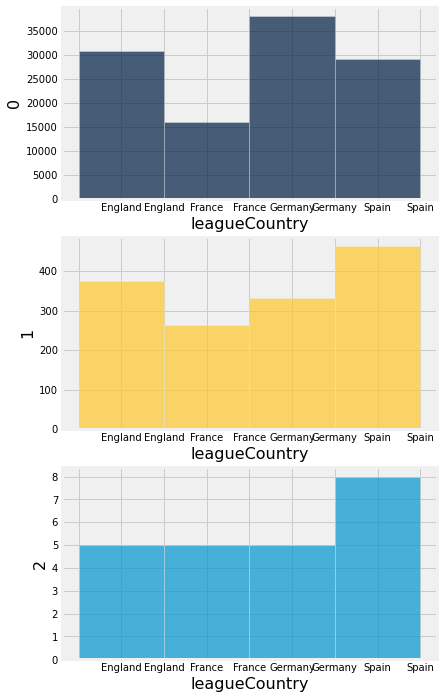

In [11]:
# SOLUTION
agg.bar("leagueCountry", overlay=False)

<div class="alert alert-info">
<b>Question:</b> 
Interpret what you see. Which countries (if any) do you hypothesize tend to award more/less red cards? Feel free to do some research on sport culture in each of these countries.
   </div>

*Insert Answer Here*

Now try creating another pivot table to break down the distribution of red cards by player position.

In [ ]:
...

In [13]:
# SOLUTION
agg_position = data.pivot("redCards", "position")
agg_position

position,0,1,2
Attacking Midfielder,10681,73,3
Center Back,20107,400,6
Center Forward,16419,169,3
Center Midfielder,4768,59,0
Defensive Midfielder,13730,174,2
Goalkeeper,10864,139,1
Left Fullback,8859,112,5
Left Midfielder,6136,71,1
Left Winger,4461,36,1
Right Fullback,8309,100,1


<div class="alert alert-info">
<b>Question:</b> Use the above table to create a bar chart of number of red cards per position.
   </div>

In [ ]:
...

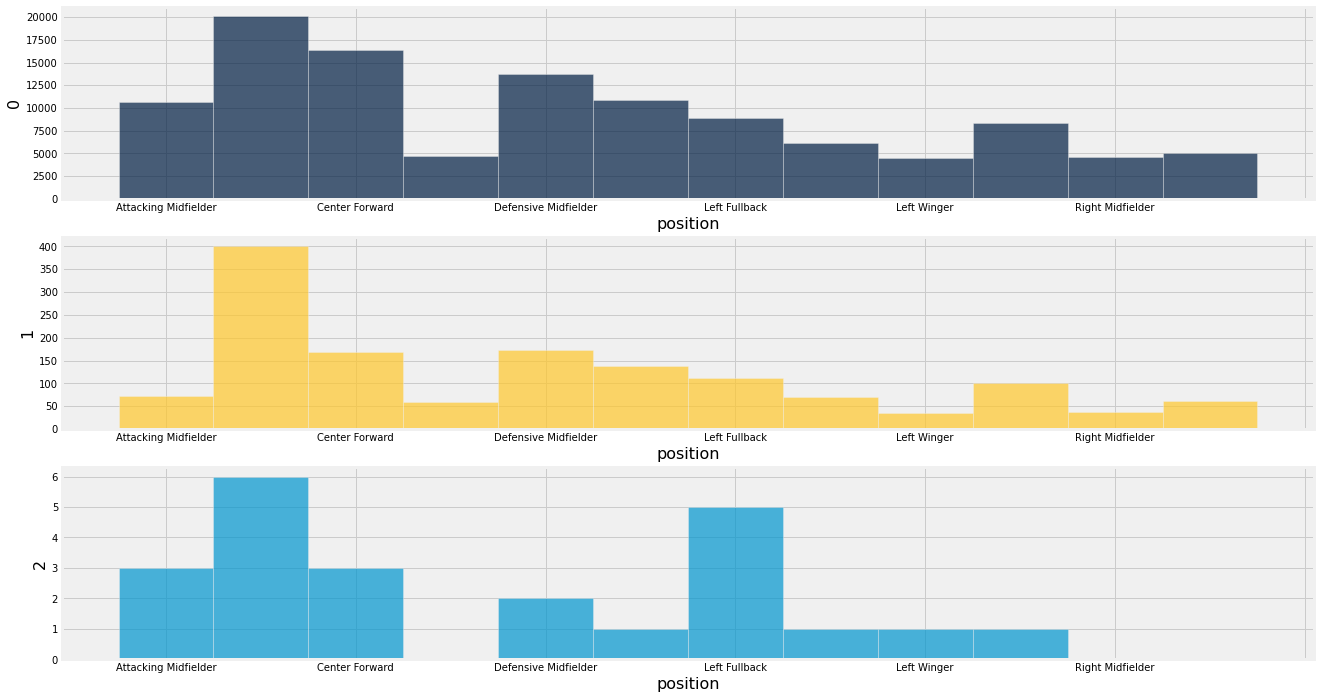

In [14]:
# SOLUTION
agg_position.bar('position', overlay=False, width=20)

<div class="alert alert-info">
<b>Question:</b> Interpret each plot. Why are some of the bars unlabeled and what do they correspond to? What positions (see <a href=https://en.wikipedia.org/wiki/Association_football_positions>Soccer Positions Info</a>) stand out and why might this be?
   </div>

*Insert Answer Here*

## 4. Using Prediction and Inference to Draw Conclusions <a id='section 4'></a>

Let's get back to our original question — does  a player's skin color have anything to do with the bias that they face in the game? Our dataset contains two variables that may help us answer that question — `rater1` and `rater2`. Since deciding what category (very light skin to very dark skin) each player fits into is a very subjective measure, we will look into each of these variables individually. Then, we'll take the average of the two variables and use that as a new metric.

Getting the average of the two rates requires a series of steps. We will perform the following steps for you.

1. Get the average of the two raters and assign it to a new variable called `avg_rate`
2. Add it to the original data table `data`
3. Remove any column that has missing data (nan) for the `avg_rate` column from the data table
4. Assign this clean table to `cleaned_soccer`.

Run the following cell to make the appropriate changes:

In [15]:
# calculate average rate, append to table
avg_rate = (data.column('rater1') + data.column('rater2')) / 2
data.append_column('avgRate', avg_rate)

# remove nan values
to_exclude= make_array()
for row_index in range(len(data.column("avgRate"))):
    if np.isnan(data.column("avgRate").item(row_index)):
        to_exclude = np.append(to_exclude, int(row_index))
cleaned_soccer = data.exclude(to_exclude)
cleaned_soccer.show(5)

playerShort,player,club,leagueCountry,height,weight,position,games,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,seIAT,meanExp,seExp,avgRate
lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,177,72,Attacking Midfielder,1,0,0,0,0.25,0.5,1,1,0.326391,0.000564112,0.396,0.00269649,0.375
john-utaka,John Utaka,Montpellier HSC,France,179,82,Right Winger,1,1,0,0,0.75,0.75,2,2,0.203375,0.0108749,-0.204082,0.0615044,0.75
aaron-hughes,Aaron Hughes,Fulham FC,England,182,71,Center Back,1,0,0,0,0.25,0,4,4,0.325185,0.00329681,0.538462,0.0137522,0.125
aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,187,80,Left Fullback,1,0,0,0,0,0.25,4,4,0.325185,0.00329681,0.538462,0.0137522,0.125
alexander-tettey,Alexander Tettey,Norwich City,England,180,68,Defensive Midfielder,1,0,0,0,1,1,4,4,0.325185,0.00329681,0.538462,0.0137522,1


Now we want to inspect the number of yellow, yellow-red, and red cards by skin color according to the two raters and the average rate. To do this, we will:

- Create tables with a subset of the data using table manipulations.
- Plot the results of each rater group by the number of red cards awarded to players based on their skin color.

**Rater 1**

In [ ]:
# create the table with the necessary rater1 information
...

In [ ]:
# make the visualization(s)
...

In [16]:
# SOLUTION
rater1 = cleaned_soccer.select(make_array('rater1', 'yellowCards', 'yellowReds', 'redCards'))
rater1_cards = rater1.group('rater1', np.mean)
rater1_cards.sort('redCards mean', descending=True)

rater1,yellowCards mean,yellowReds mean,redCards mean
1,0.381349,0.0138404,0.014781
0.75,0.37688,0.0116871,0.01377
0.25,0.43728,0.0133141,0.0135874
0.5,0.384941,0.0119095,0.0134282
0,0.390482,0.0113724,0.0114582


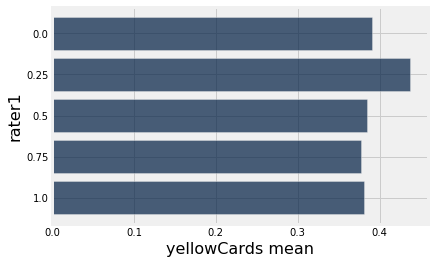

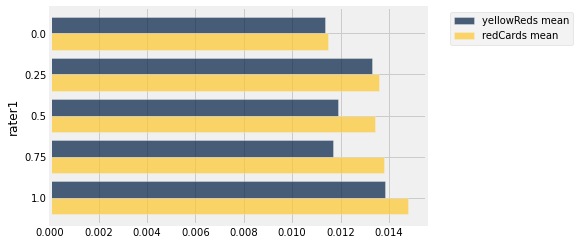

In [17]:
# SOLUTION
# have the interns try to figure out the best way to visualize this
rater1_cards.select('rater1', 'yellowCards mean').barh('rater1')
rater1_cards.select('rater1', 'yellowReds mean', 'redCards mean').barh('rater1')

**Rater 2**

In [ ]:
# create the table with the necessary rater1 information
...

In [ ]:
# make the visualization(s)
...

In [18]:
# SOLUTION
rater2 = cleaned_soccer.select(make_array('rater2', 'yellowCards', 'yellowReds', 'redCards'))
rater2_cards = rater2.group('rater2', np.mean)
rater2_cards.sort('redCards mean', descending=True)

rater2,yellowCards mean,yellowReds mean,redCards mean
0.5,0.399259,0.0127978,0.0142292
1,0.375043,0.0134875,0.0141675
0.25,0.43116,0.0128048,0.0132826
0.75,0.360597,0.0109998,0.0127423
0,0.38468,0.011338,0.0111876


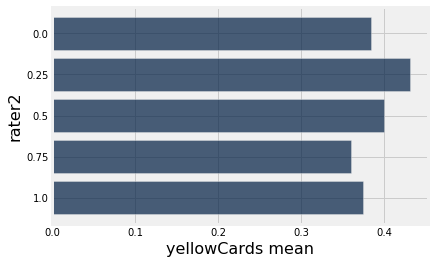

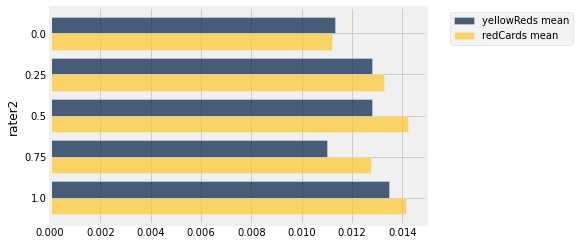

In [19]:
# SOLUTION
# have the interns try to figure out the best way to visualize this
rater2_cards.select('rater2', 'yellowCards mean').barh('rater2')
rater2_cards.select('rater2', 'yellowReds mean', 'redCards mean').barh('rater2')

**Average Rating**

In [ ]:
# YOUR CODE HERE — the following format may help you

# Table
# group 
...
# sort
...
# select
...

In [ ]:
# make the visualization(s)
...

In [20]:
# SOLUTION
avgRates = cleaned_soccer.select(make_array('avgRate', 'yellowCards', 'yellowReds', 'redCards'))
avgRates_cards = avgRates.group('avgRate', np.mean)
avgRates_cards.sort('redCards mean', descending=True)

avgRate,yellowCards mean,yellowReds mean,redCards mean
0.375,0.47471,0.0167372,0.0152658
0.875,0.330375,0.0121017,0.0149254
0.5,0.376054,0.0113226,0.0144543
1,0.386479,0.0139272,0.0143624
0.75,0.384288,0.0113964,0.0141316
0.25,0.44083,0.0131363,0.0137874
0,0.388502,0.0114537,0.0114218
0.125,0.387724,0.0111118,0.0111118
0.625,0.316537,0.0100779,0.00595511


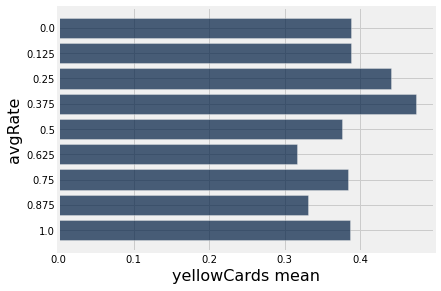

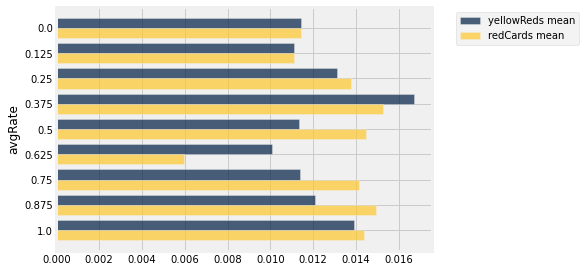

In [21]:
# SOLUTION
# have the interns try to figure out the best way to visualize this
avgRates_cards.select('avgRate', 'yellowCards mean').barh('avgRate')
avgRates_cards.select('avgRate', 'yellowReds mean', 'redCards mean').barh('avgRate')

<div class="alert alert-info">
<b>Question:</b> Interpret each plot. Go back to your original question. Do you think skin color manifest in racial bias in soccer? Why or why not? How could someone conduct further analysis (e.g., what would they need)?
   </div>

*Insert Answer Here*

<div class="alert alert-info">
<b>Question:</b> What is something interesting you learned from the project?
   </div>

*Insert Answer Here*

## 5. The Data Science Life Cycle: Your Take <a id='section 5'></a>

Now, formulate and answer some questions you have about the data. Follow the data science life cycle, and be sure to document the different patterns you notice. Take note of what issues also appear and how they can be resolved (e.g., collecting more data).

Feel free to scroll up to the first cell where we load in our data. That way, you can use *all* of the data. In order to do this, you may need to copy and paste when we "read" in the data as well as when the data is cleaned. Observe the different ways that the data is cleaned in this notebook and copy and paste the code cell you find the most effective.

**Source:** Data 88 (Sports Analytics)
<br>
**Adapted by:** Alleanna Clark, Ashley Quiterio, Karla Palos Castellanos, Pratibha Sriram, William Furtado, and Andrew Chen